# Informatyka systemów złożonych – laboratorium 2
## Mateusz Kocot

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from ifs import IFS
from roulette_ifs import RouletteIFS

# Utils

In [2]:
def plot_image(image, size=(5, 5), show=True, subplot=None):
    if size is not None:
        plt.figure(figsize=size)

    if subplot is not None:
        plt.subplot(*subplot)
        
    plt.imshow(image, cmap='Greys')
    if show:
        plt.show()

# Zadanie 1. Kopiarka wielokrotnie redukująca

## 1.1. Przykładowy obraz

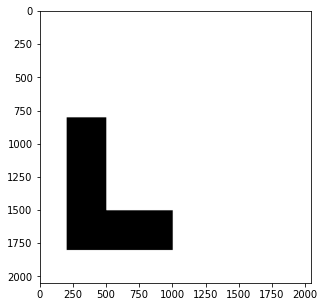

In [3]:
image = np.zeros((2048, 2048))

image[800:1800, 200:500] = 1
image[1500:1800, 500:1000] = 1

plot_image(image)

## 1.2. Wynik pojedynczej kontrakcji

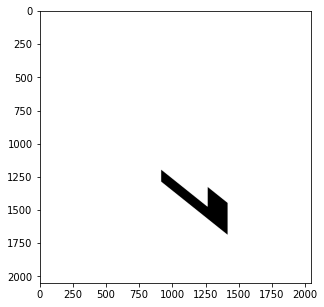

In [4]:
W = [
    np.array([
        [0.4, -0.3, 0.5],
        [0.5, 0, 0.25]
    ])
]

ifs = IFS(image, W)
ifs.iteration()
plot_image(ifs.draw_image())

## 1.3. Kompozycja 3 kontrakcji

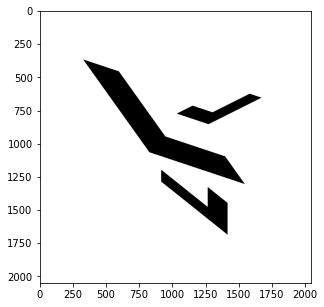

In [5]:
W = [
    np.array([
        [0.4, -0.3, 0.5], 
        [0.5, 0, 0.25]
    ]),
    np.array([
        [0.7, 0.3, -0.125], 
        [0.5, 0.9, -0.125]
    ]),
    np.array([
        [0.2, -0.1, 0.25], 
        [-0.4, -0.3, 1.]
    ]),
]

ifs = IFS(image, W)
ifs.iteration()
plot_image(ifs.draw_image())

## 1.5 Wybrane odwzorowania

Iteration 0...
Iteration 20...
Iteration 40...
Iteration 60...
Iteration 80...


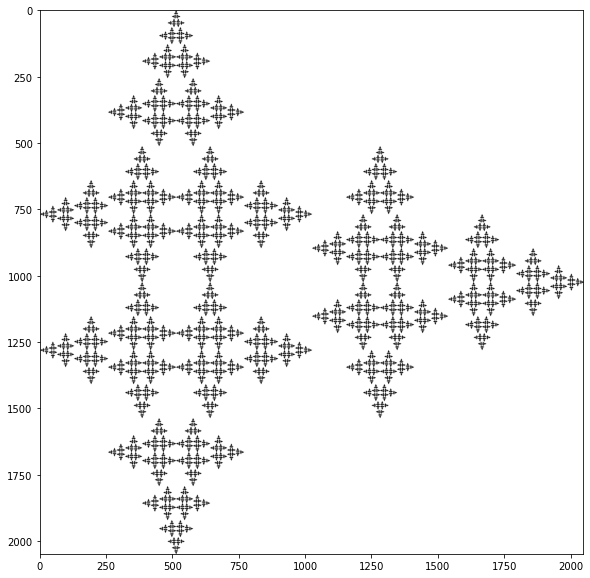

In [6]:
W = [
    np.array([
        [0., -0.5, 0.5], 
        [0.5, 0., 0.]
    ]),
    np.array([
        [0., 0.5, 0.5], 
        [-0.5, 0., 0.5]
    ]),
    np.array([
        [0.5, 0., 0.25], 
        [0., 0.5, 0.5]
    ]),
]

ifs = IFS(image, W, n_jobs=8)
ifs.run_iterations(100, log=20)
plot_image(ifs.draw_image(), size=(10, 10))

Iteration 0...
Iteration 20...
Iteration 40...
Iteration 60...
Iteration 80...


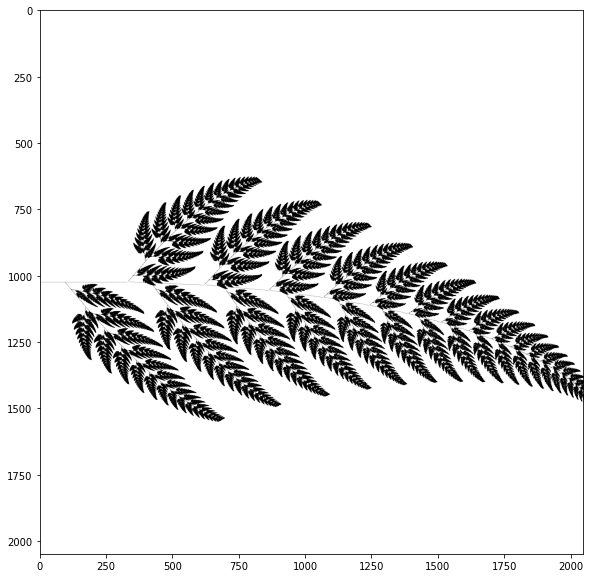

In [7]:
W = [
    np.array([
        [0.849, 0.037, 0.075], 
        [-0.037, 0.849, 0.1830]
    ]),
    np.array([
        [0.197, -0.226, 0.400], 
        [0.226, 0.197, 0.049]
    ]),
    np.array([
        [-0.150, 0.283, 0.575], 
        [0.260, 0.237, -0.084]
    ]),
    np.array([
        [0.000, 0.000, 0.500], 
        [0.000, 0.160, 0.000]
    ]),
]

ifs = IFS(image, W, n_jobs=8)
ifs.run_iterations(100, log=20)
plot_image(ifs.draw_image(), size=(10, 10))

## 1.6. Własne konfiguracje

Iteration 0...
Iteration 20...
Iteration 40...
Iteration 60...
Iteration 80...


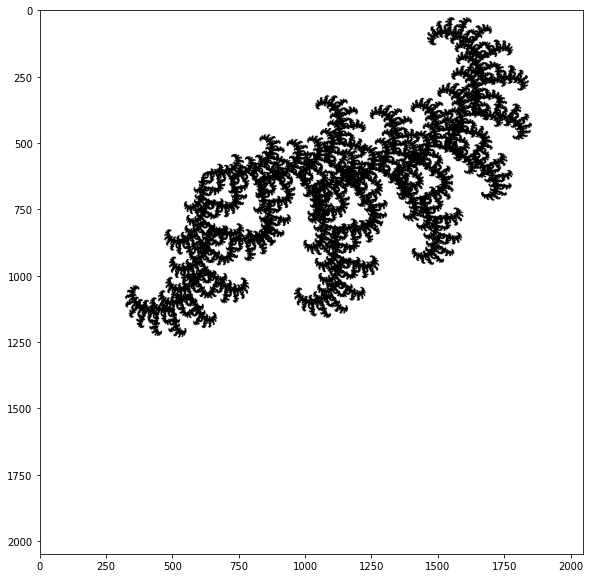

In [8]:
W = [
    np.array([
        [0.5, 0., 0.15], 
        [0., 0.5, 0.15]
    ]),
    np.array([
        [0., 0.5, 0.15], 
        [0.5, 0., 0.15]
    ]),
    np.array([
        [0.7, -0.25, 0.2], 
        [0.3, 0.7, 0.2]
    ]),
]

ifs = IFS(image, W, n_jobs=8)
ifs.run_iterations(100, log=20)
plot_image(ifs.draw_image(), size=(10, 10))

Iteration 0...
Iteration 20...
Iteration 40...
Iteration 60...
Iteration 80...


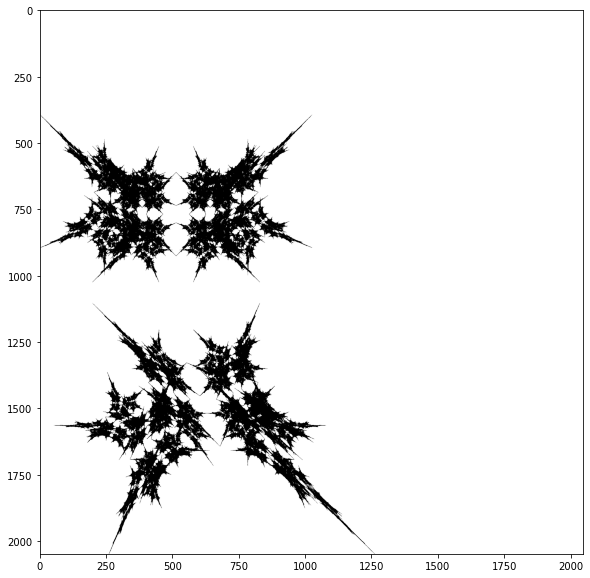

In [9]:
W = [
    np.array([
        [0., -0.5, 0.5], 
        [0.5, 0., 0.]
    ]),
    np.array([
        [0., -0.5, 0.5], 
        [-0.5, 0., 0.5]
    ]),
    np.array([
        [0.2, 0.5, 0.5], 
        [0.5, 0.2, 0.]
    ]),
    np.array([
        [0.2, 0.5, 0.5], 
        [-0.5, 0.2, 0.5]
    ]),
]

ifs = IFS(image, W, n_jobs=8)
ifs.run_iterations(100, log=20)
plot_image(ifs.draw_image(), size=(10, 10))

Iteration 0...
Iteration 20...
Iteration 40...
Iteration 60...
Iteration 80...


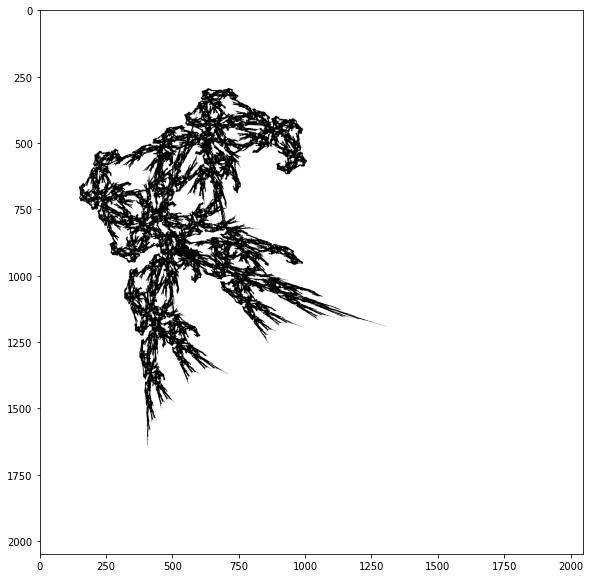

In [10]:
W = [
    np.array([
        [0., -0.5, 0.5], 
        [0.5, 0., 0.]
    ]),
    np.array([
        [0.2, 0.4, 0.05], 
        [-0.5, 0.3, 0.45]
    ]),
    np.array([
        [0.34, 0.1, 0.32], 
        [0.2137, 0.6, 0.13]
    ]),
    np.array([
        [0.6, 0., 0.32], 
        [0., 0.34, 0.13]
    ])
]

ifs = IFS(image, W, n_jobs=8)
ifs.run_iterations(100, log=20)
plot_image(ifs.draw_image(), size=(10, 10))

# Zadanie 2. Kopiarka wielokrotnie redukująca z ruletką

## 2.1, 2.2. Przykłady dla konfiguracji z zad. 1 i eksperymenty z prawdopodobieństwem

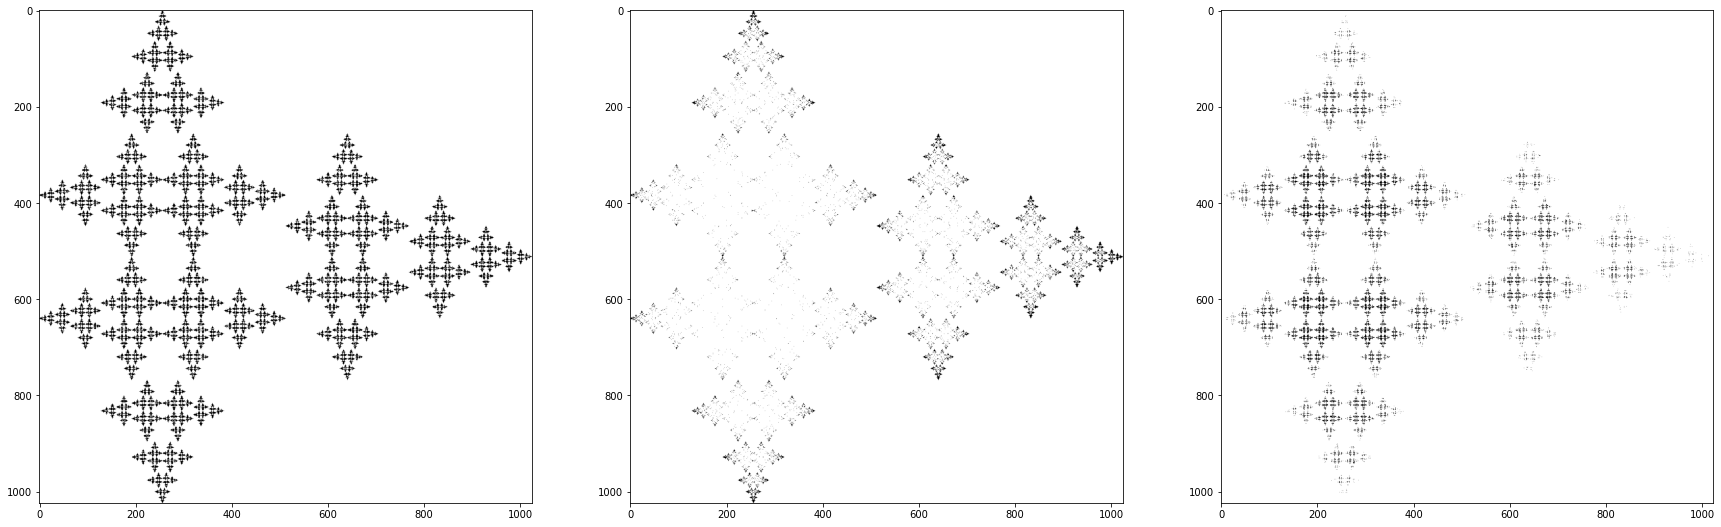

In [11]:
W = [
    np.array([
        [0., -0.5, 0.5], 
        [0.5, 0., 0.]
    ]),
    np.array([
        [0., 0.5, 0.5], 
        [-0.5, 0., 0.5]
    ]),
    np.array([
        [0.5, 0., 0.25], 
        [0., 0.5, 0.5]
    ]),
]

plt.figure(figsize=(30, 10))

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8)
ifs.run_iterations(50)
plt.subplot(1, 3, 1)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.1, 0.1, 0.8))
ifs.run_iterations(50)
plt.subplot(1, 3, 2)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.45, 0.45, 0.1))
ifs.run_iterations(50)
plt.subplot(1, 3, 3)
plt.imshow(ifs.draw_image(), cmap='Greys')

plt.show()

Zmieniając wartości prawdopodobieństwa udało się tutaj położyć nacisk na część zewnętrzną (środkowy obrazek) i wewnętrzną (obrazek po prawej stronie).

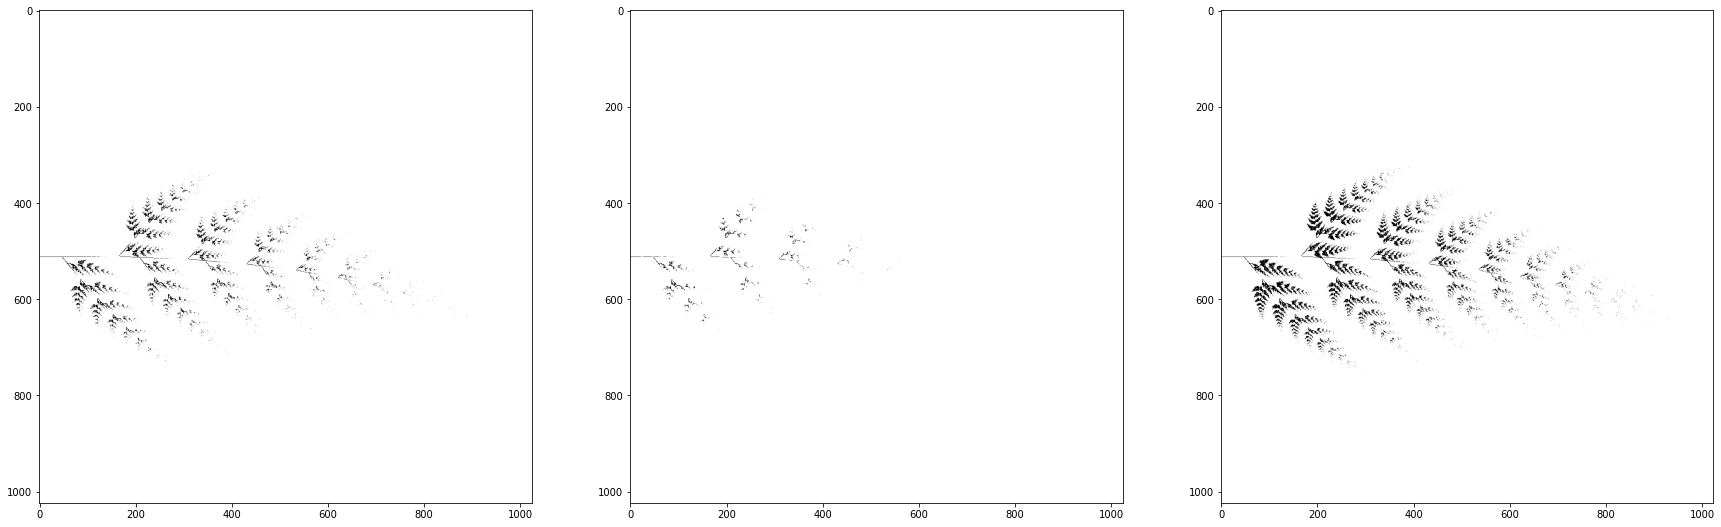

In [12]:
W = [
    np.array([
        [0.849, 0.037, 0.075], 
        [-0.037, 0.849, 0.1830]
    ]),
    np.array([
        [0.197, -0.226, 0.400], 
        [0.226, 0.197, 0.049]
    ]),
    np.array([
        [-0.150, 0.283, 0.575], 
        [0.260, 0.237, -0.084]
    ]),
    np.array([
        [0.000, 0.000, 0.500], 
        [0.000, 0.160, 0.000]
    ]),
]

plt.figure(figsize=(30, 10))

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8)
ifs.run_iterations(50)
plt.subplot(1, 3, 1)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.04, 0.32, 0.32, 0.32))
ifs.run_iterations(50)
plt.subplot(1, 3, 2)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.32, 0.32, 0.32, 0.04))
ifs.run_iterations(50)
plt.subplot(1, 3, 3)
plt.imshow(ifs.draw_image(), cmap='Greys')

plt.show()

Niestety, w tym przypadku nie udało się wygenerować tak pięknej paprotki jak poprzednio. Na pomoc przychodzą różne parametryzacje prawdopodobieństwa. W przypadku środkowym niewiele to pomogło, a nawet zaszkodziło. Natomiast po prawej stronie udało się nieco poprawić rezultat końcowy.

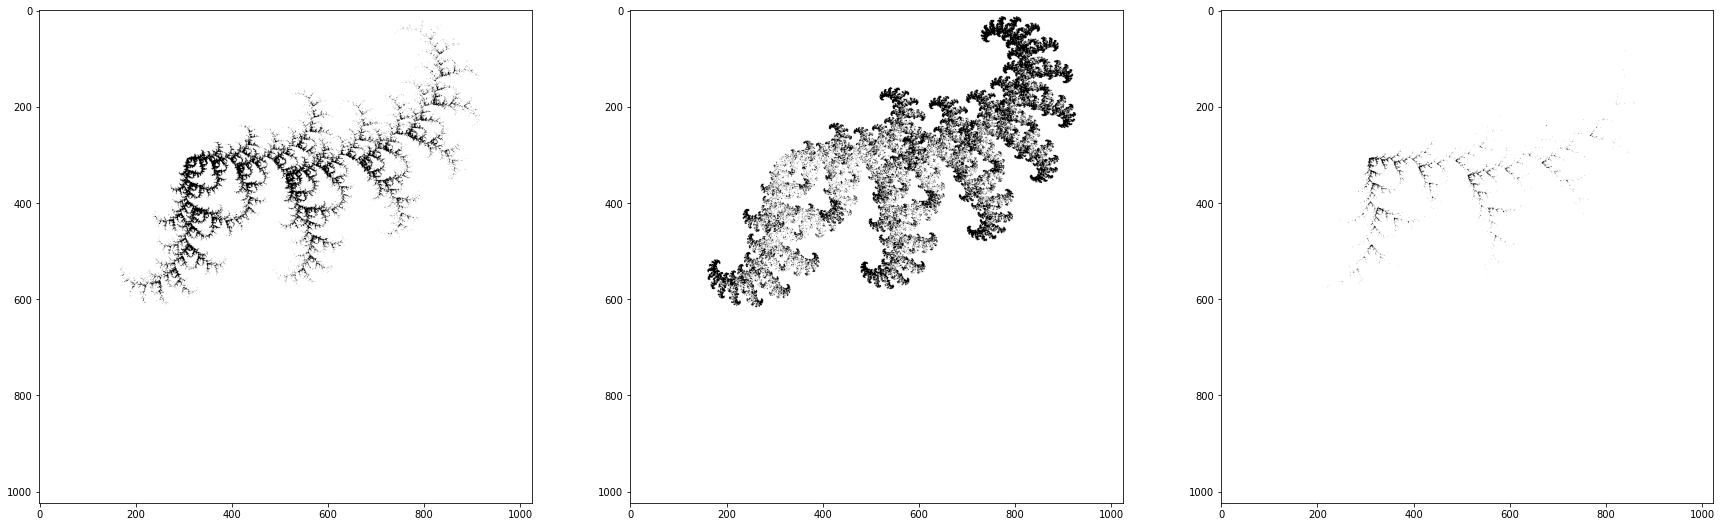

In [13]:
W = [
    np.array([
        [0.5, 0., 0.15], 
        [0., 0.5, 0.15]
    ]),
    np.array([
        [0., 0.5, 0.15], 
        [0.5, 0., 0.15]
    ]),
    np.array([
        [0.7, -0.25, 0.2], 
        [0.3, 0.7, 0.2]
    ]),
]

plt.figure(figsize=(30, 10))

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8)
ifs.run_iterations(50)
plt.subplot(1, 3, 1)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.1, 0.1, 0.8))
ifs.run_iterations(50)
plt.subplot(1, 3, 2)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.45, 0.45, 0.1))
ifs.run_iterations(50)
plt.subplot(1, 3, 3)
plt.imshow(ifs.draw_image(), cmap='Greys')

plt.show()

Tutaj przy domyślnych prawdopodobieństwach waga jest stawiana głównie na najgrubszych częściach. Udało mi się tak dobrać parametry, by kształt całej figury był dobrze widoczny (środek). Obrazek z prawej strony nie wygląda już tak interesujaco. W tym przypadku większość punktów przyporządkowywana jest do głównych części figury i nie rozprzestrzenia się ona poprawnie.

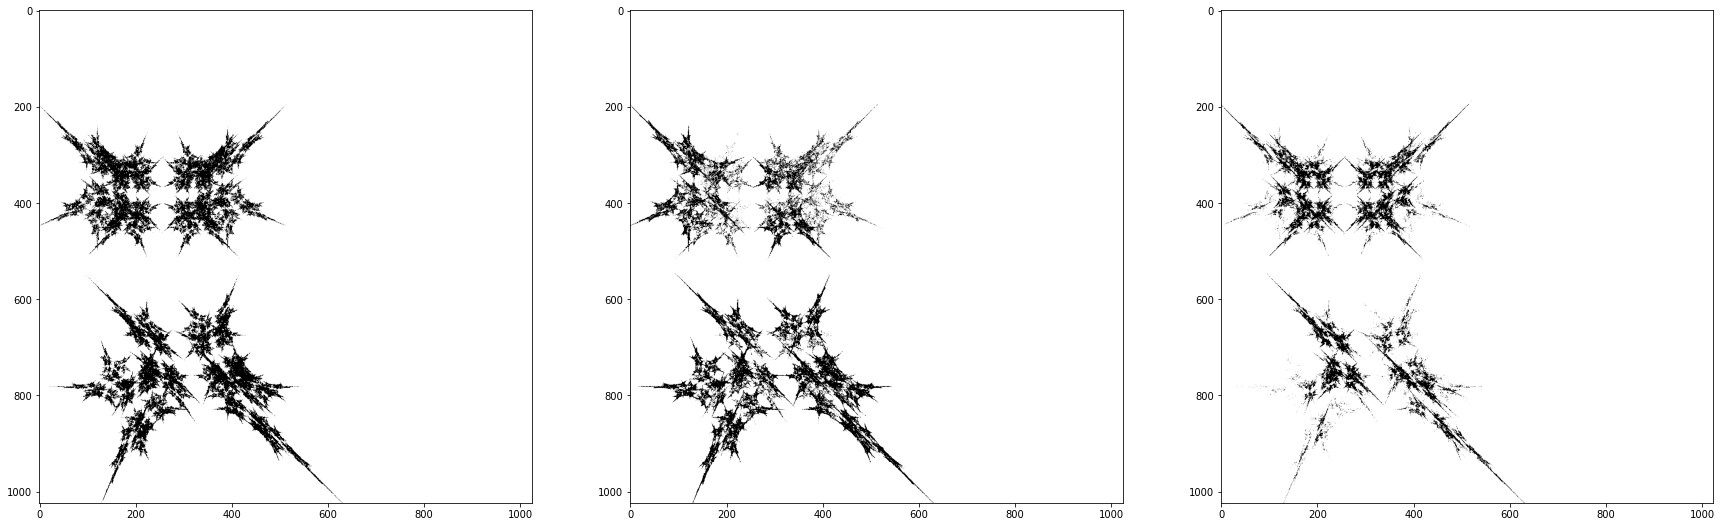

In [14]:
W = [
    np.array([
        [0., -0.5, 0.5], 
        [0.5, 0., 0.]
    ]),
    np.array([
        [0., -0.5, 0.5], 
        [-0.5, 0., 0.5]
    ]),
    np.array([
        [0.2, 0.5, 0.5], 
        [0.5, 0.2, 0.]
    ]),
    np.array([
        [0.2, 0.5, 0.5], 
        [-0.5, 0.2, 0.5]
    ]),
]

plt.figure(figsize=(30, 10))

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8)
ifs.run_iterations(50)
plt.subplot(1, 3, 1)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.04, 0.32, 0.32, 0.32))
ifs.run_iterations(50)
plt.subplot(1, 3, 2)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.32, 0.32, 0.32, 0.04))
ifs.run_iterations(50)
plt.subplot(1, 3, 3)
plt.imshow(ifs.draw_image(), cmap='Greys')

plt.show()

Tutaj domyślna parametryzacja praktycznie niczym nie rózni się od zwykłego IFS. Zmieniając parametry uzyskujemy interesujące obrazki w skali szarości.

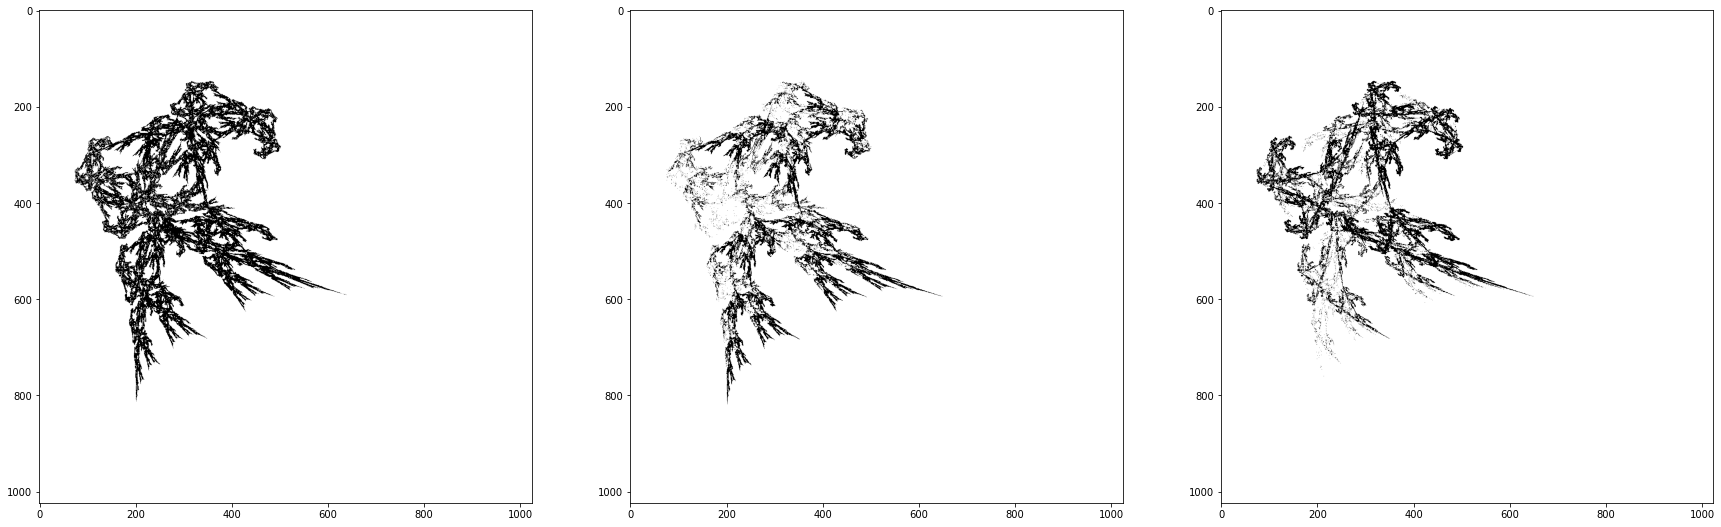

In [15]:
W = [
    np.array([
        [0., -0.5, 0.5], 
        [0.5, 0., 0.]
    ]),
    np.array([
        [0.2, 0.4, 0.05], 
        [-0.5, 0.3, 0.45]
    ]),
    np.array([
        [0.34, 0.1, 0.32], 
        [0.2137, 0.6, 0.13]
    ]),
    np.array([
        [0.6, 0., 0.32], 
        [0., 0.34, 0.13]
    ])
]

plt.figure(figsize=(30, 10))

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8)
ifs.run_iterations(50)
plt.subplot(1, 3, 1)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.04, 0.32, 0.32, 0.32))
ifs.run_iterations(50)
plt.subplot(1, 3, 2)
plt.imshow(ifs.draw_image(), cmap='Greys')

ifs = RouletteIFS(W, n_points=400_000, size=1024, n_jobs=8, P=(0.32, 0.32, 0.32, 0.04))
ifs.run_iterations(50)
plt.subplot(1, 3, 3)
plt.imshow(ifs.draw_image(), cmap='Greys')

plt.show()

Podobnie jak poprzednio. Widać jak fajnie można "pokolorować" obrazek generując różne zagęszczenia punktów. Stosując np. kolorowanie bazujące na gęstości, możnaby uzyskać ciekawe rezultaty (w szczególności na środkowym obrazku).